In [1]:
import tensorflow as tf
import os
from skimage.io import imread_collection
import pandas as pd
from PIL import Image
from fastai.vision.all import *

In [2]:
widthImg = 128
heightImg = 128
chanels = 3

In [3]:
# pip install git+https://github.com/qubvel/segmentation_models

In [4]:
import segmentation_models as sm
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from keras.models import model_from_json

from keras.layers import Input, Conv2D, Reshape
from keras.models import Model

Segmentation Models: using `keras` framework.


In [5]:
PATH = './'
TRAIN = './train_v2/'
TEST = './test_v2/'
SEGMENTATION = './train_ship_segmentations_v2.csv'

In [6]:
nw = 2   #number of workers for data loader
arch = resnet34 #specify target architecture

In [7]:
train_names = [f for f in os.listdir(TRAIN)]
tr_n, val_n = train_test_split(train_names, test_size=0.05, random_state=42)
segmentation_df = pd.read_csv(os.path.join(PATH, SEGMENTATION)).set_index('ImageId')
# print(segmentation_df.columns)
# segmentationNames = segmentation_df['ImageId'].tolist()
# # print(segmentationNames)
# segmentation_df.set_index(segmentationNames,inplace = False)

In [8]:
import math
newSeg = pd.read_csv(os.path.join(PATH, SEGMENTATION))
print(newSeg.iloc[0]['ImageId'])
segDict = dict()
# print(newSeg.head)
for i in range(len(newSeg)):
    temp = newSeg.iloc[i]['EncodedPixels']
    # print(temp)
    if(type(temp)==str):
        segDict[newSeg.iloc[i]['ImageId']] = newSeg.iloc[i]['EncodedPixels']
print(len(segDict))
# print(newSeg.head)

00003e153.jpg
42556


In [9]:
def cut_empty(names):
    return [name for name in names 
            if(type(segmentation_df.loc[name]['EncodedPixels']) != float)]

tr_n = cut_empty(tr_n)
val_n = cut_empty(val_n)
print(len(tr_n))

40428


PILImage mode=I size=768x768


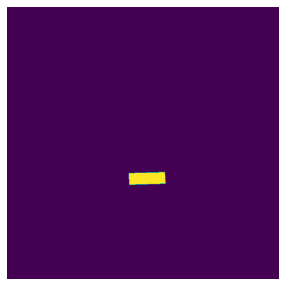

In [152]:
# def get_mask(img_id, df):
#     shape = (768,768)
#     img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
#     masks = df.loc[img_id]['EncodedPixels']
#     if(type(masks) == float): return img.reshape(shape)
#     if(type(masks) == str): masks = [masks]
#     for mask in masks:
#         s = mask.split()
#         for i in range(len(s)//2):
#             start = int(s[2*i]) - 1
#             length = int(s[2*i+1])
#             img[start:start+length] = 1
#     return img.reshape(shape).T
# for key in segDict:
#     print(segDict[key])
#     PILImage.show(segDict[key])
#     break
    

In [67]:
im=PILImage.create("./train_v2/{}".format(tr_n[0]))
newSize=(128,128)
im1 = im.resize(newSize)
# im1.show()

In [10]:
sm.set_framework('tf.keras')
sm.framework()

'tf.keras'

In [11]:
backbone = 'resnet34'
preprocess_input = get_preprocessing(backbone)

In [154]:
# import cv2 as cv
# # file="0017c19d6.jpg"
# ar=segDict["0017c19d6.jpg"].split(" ")

# rle=[int(x) for x in ar]
# pixel,pixel_count = [],[]
# [pixel.append(rle[i]) if i%2==0 else pixel_count.append(rle[i]) for i in range(0, len(rle))]
# rle_pixels = [list(range(pixel[i],pixel[i]+pixel_count[i])) for i in range(0, len(pixel))]
# rle_mask_pixels = sum(rle_pixels,[]) 
# shape=np.array(cv.imread("./train_v2/{}".format(file))).shape
# # plt.imshow(cv.imread("./train_v2/{}".format(file)))
# mask_img = np.zeros((shape[0]*shape[1],1), dtype=int)
# mask_img[rle_mask_pixels] = 255
# l,b=cv.imread("./train_v2/{}".format(file)).shape[0], cv.imread("./train_v2/{}".format(file)).shape[1]
# print(l,b)
# mask = np.reshape(mask_img, (b, l)).T
# msk = PILImage.create(mask)
# # plt.imshow(mask)
# msk.show()

In [153]:
# ar=segmentation_df.loc[file]
# setMasks = []
# for i in range(1000):
#     file=tr_n[i]
#     # ar=segmentation_df.loc[file][0].split(" ")
#     rle=[int(x) for x in ar]
#     pixel,pixel_count = [],[]
#     [pixel.append(rle[i]) if i%2==0 else pixel_count.append(rle[i]) for i in range(0, len(rle))]
#     rle_pixels = [list(range(pixel[i],pixel[i]+pixel_count[i])) for i in range(0, len(pixel))]
#     rle_mask_pixels = sum(rle_pixels,[]) 
#     shape=np.array(cv.imread("./train_v2/{}".format(file))).shape
#     # plt.imshow(cv.imread("./train_v2/{}".format(file)))
#     mask_img = np.zeros((shape[0]*shape[1],1), dtype=int)
#     mask_img[rle_mask_pixels] = 255
#     l,b=cv.imread("./train_v2/{}".format(file)).shape[0], cv.imread("./train_v2/{}".format(file)).shape[1]
#     print(l,b)
#     mask = np.reshape(mask_img, (b, l)).T
#     msk = PILImage.create(mask)
#     # plt.imshow(mask)
#     # msk.show()
#     setMasks.append(msk)
# print(len(setMasks))

In [42]:
from skimage import io
count = 0
newSegDict = []
newImgDict = []
# print("./train_v2/{}".format("atul.jpg"))
for key in segDict:
    count+=1
    im=io.imread("./train_v2/{}".format(key))
    newSegDict.append(segDict[key])
    newImgDict.append(im)
    if(count>1000):
        break



In [43]:
xtrain = np.array(newImgDict)
ytrain = np.array(newSegDict)

In [46]:
ytrain.shape

(1001,)

In [31]:
from PIL import Image
y = np.zeros((1000, 28,28),dtype = np.float32)
x = np.zeros((1000,224,224,1), dtype = np.float32)
for key in newImgDict:
    img = Image.open("./train_v2/{}".format(key))
    img = img.resize((224,224))
    img = img.reshape(img.convert('L'),(224,224,1))
    # x[n] = img

TypeError: an integer is required (got type tuple)

In [25]:
x_train = preprocess_input(newImgDict)

In [166]:
model = Unet(backbone, encoder_weights = 'imagenet')

85532672/85521592 [==============================] - 115s 1us/step


In [13]:
count = 0
newSegDict = []
newImgDict = []
newValDict = []
newValImg = []
# print("./train_v2/{}".format("atul.jpg"))
for key in segDict:
    count+=1
    im=PILImage.create("./train_v2/{}".format(key))
    newSize=(128,128)
    im1 = im.resize(newSize)
    # im1.show()
    if(count<900):
        newSegDict.append(segDict[key])
        newImgDict.append(im)
    else:
        newValDict.append(segDict[key])
        newValImg.append(im)
    if(count>1000):
        break

In [15]:
# newSegDict1 = np.array(newSegDict).astype(np.float32)
# newImgDict1 = np.array(newImgDict).astype(np.float32)
# newValDict1 = np.array(newValDict).astype(np.float32)
# newValImg1 = np.array(newValImg).astype(np.float32)

# arrXVal = np.array(np.asarray(newSegDict[0]))
print(len(newSegDict))
arrXVal = []
for i in range(1,len(newSegDict)-1):
    tempImg = np.asarray(newSegDict[i])
    arrXVal.append(tempImg)
    # print("Hi")
    
# arrXTrain = np.array(np.asarray(newImgDict[0]))
arrXTrain = []
for i in range(1,len(newImgDict)-1):
    tempImg = np.asarray(newImgDict[i])
    arrXTrain.append(tempImg)
    
# arrYVal = np.array(np.asarray(newValDict1[0]))
arrYVal = []
for i in range(1,len(newValDict)-1):
    tempImg = np.asarray(newValDict[i])
    arrYVal.append(tempImg)
    
# arrYTrain = np.array(np.asarray(newValImg1[0]))
arrYTrain = []
ctemp = 0
for i in range(1,len(newValImg)-1):
    tempImg = np.asarray(newValImg[i])
    if(ctemp==0):
        print(tempImg.shape)
        ctemp+=1
    arrYTrain.append(tempImg)

899
(768, 768, 3)


In [16]:
x_train = preprocess_input(arrXTrain)
x_val = preprocess_input(arrYTrain)

In [17]:
len(arrXTrain)

897

In [45]:
# from fastai import *
model = Unet(backbone, encoder_weights = 'imagenet')
model.compile('Adam', 'binary_crossentropy', ['binary_accuracy'])
model.fit(x = xtrain, y = ytrain, batch_size = 16, epochs = 10, validation_data = (xtrain, ytrain,))

Epoch 1/10


ValueError: in user code:

    File "c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 1932, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\keras\backend.py", line 5247, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 768, 768, 1) vs (None,)).
